<a href="https://colab.research.google.com/github/neiluz/IT_Academy_ProyectoFinal/blob/main/Notebooks/Notebook%20N%C2%B0%207%203b%20Modelo%20pre%20entrenado%20Bert%20Vader%20Balanceo%20con%20prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color: #1DA1F2; padding: 20px;"><b><h1> Descifrando el lenguaje emocional en Twitter: Un análisis predictivo basado en aprendizaje automático. </h1></b></div>

**Autor**: Neivys Luz González Gómez

La identificación de emociones es una tarea fundamental en el campo del procesamiento de lenguaje natural, que se enfoca en clasificar textos según su tono emocional. A pesar de que el objetivo es identificar una amplia variedad de emociones humanas, la mayoría de los conjuntos de datos disponibles se limitan a las polaridades positiva, negativa y, en ocasiones, neutral.

Detectar emociones a partir de textos es un reto complejo en el procesamiento del lenguaje natural, ya que se trata de un problema de clasificación multiclase y, en muchas ocasiones, no hay suficientes datos etiquetados disponibles. Sin embargo, este conjunto de datos etiquetado proporciona la oportunidad de aplicar diversas técnicas de análisis exploratorio y modelado para entender mejor la dinámica emocional en las redes sociales y mejorar la capacidad de detección en tiempo real.

El conjunto de datos de emociones se obtiene a partir de mensajes en inglés de Twitter y contiene seis emociones básicas: neutralidad, preocupación, felicidad, tristeza, amor, sorpresa, diversión, alivio, odio, vacío, entusiasmo y aburrimiento. Este conjunto de datos ofrece una variedad más amplia de emociones humanas, lo que permite el entrenamiento y la evaluación de modelos de análisis de sentimientos con mayor precisión y exhaustividad.

<div class="alert alert-info alert-info"><b><h3>Objetivo General</h3></b>
    
**Desarrollar un modelo que permita detectar emociones en los tweets y analizar patrones en el lenguaje utilizado en Twitter para ayudar en la detección temprana de trastornos emocionales como la depresión, la ansiedad, entre otros.**
</div>

---

# Notebook N° 7.3b: Modelo Deep Learning con el modelo pre entrenado Bert - Polarity Vader - Balanceo de clases

En este notebook se presenta la evaluación del modelo pre-entrenado Bert en la tarea de clasificación de sentimientos en tweets. Para ello, se utilizó un dataset preprocesado en el que las emociones originales fueron transformadas mediante el análisis de sentimiento de Polaridad de Varder.

El modelo implementado es un clasificador de texto basado en técnicas de aprendizaje profundo (deep learning) que utiliza el modelo pre-entrenado BERT para clasificar los tweets en tres categorías: positivo, negativo y neutral. BERT, acrónimo de Bidirectional Encoder Representations from Transformers, es un modelo de lenguaje basado en Transformers que fue pre-entrenado en enormes cantidades de datos textuales, lo que le permite capturar patrones complejos en el lenguaje. Al utilizar un modelo pre-entrenado como BERT, se pueden obtener mejores resultados con menos datos de entrenamiento y menos tiempo de entrenamiento. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.1 MB/s eta 0:00:00


In [2]:
# general purpose packages
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

#data processing
import re, string
import nltk

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

#keras
import tensorflow as tf
from tensorflow import keras

#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#set seed for reproducibility
seed=42

import warnings
warnings.filterwarnings('ignore')

In [3]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


<div class="alert alert-block alert-info">
<b><h2> Cargar Dataset.</h2></b> 
</div>

In [4]:
df3 = pd.read_pickle('/content/dataset3.pickle')

In [5]:
df3

,content,polarity_vader
0,layin bed headache ughhhhwaitin call,1
1,funeral ceremonygloomy friday,0
2,want hang friend soon,2
3,want trade someone houston ticket one,1
4,repinging didnt go prom bc bf didnt like friend,0
...,...,...
38983,succesfully following tayla,1
38984,happy mother day love,2
38985,happy mother day mommy woman man long youre mo...,2
38986,wassup beautiful follow peep new hit single ww...,2


## 1. Preparación del Dataset

In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38988 entries, 0 to 38987
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   content         38988 non-null  object
 1   polarity_vader  38988 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 457.0+ KB


### 1.1 Verificar nulos y NaM

In [7]:
df3.isnull().sum()

content           0
polarity_vader    0
dtype: int64

In [8]:
df3.isna().sum()

content           0
polarity_vader    0
dtype: int64

* **Longitud del texto**

Se crea una columna para alojar la longitud del texto limpio

In [9]:
text_len = []
for text in df3.content :
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [10]:
df3['text_len'] = text_len

In [11]:
df3.head()

,content,polarity_vader,text_len
0,layin bed headache ughhhhwaitin call,1,5
1,funeral ceremonygloomy friday,0,3
2,want hang friend soon,2,4
3,want trade someone houston ticket one,1,6
4,repinging didnt go prom bc bf didnt like friend,0,9


### 1.3 Limpieza más profunda

Se realizará si se puede reañizar una limpieza adicional verificando la versión tokenizadora de las oraciones.

* **Primero, importar el tokenizador BERT.**

In [12]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [13]:
token_lens = []

for txt in df3['content'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    
max_len=np.max(token_lens)

In [14]:
print(f"Maxima logitud de las oraciones TOKENIZED: {max_len}")

Maxima logitud de las oraciones TOKENIZED: 61


In [15]:
df3['token_lens'] = token_lens

In [16]:
df3.head()

,content,polarity_vader,text_len,token_lens
0,layin bed headache ughhhhwaitin call,1,5,13
1,funeral ceremonygloomy friday,0,3,8
2,want hang friend soon,2,4,6
3,want trade someone houston ticket one,1,6,8
4,repinging didnt go prom bc bf didnt like friend,0,9,14


<h3>Observaciones:</h3>

   *  Se puede observar que el data set no tiene valores nulos o NaN. 
   *  Se puede observar que el data set no tiene valores duplicados.  
   *  Al tokenizar el texto, se observa que aumentan la cantidad de palabras en la oracion o tweet.

## 2. Modelo

### 2.1 Balanceo de clases by Undersampling

In [17]:
df3['polarity_vader'].value_counts()

1    16367
2    16239
0     6382
Name: polarity_vader, dtype: int64

Se puede observar que existe un desblanceo marcado entre la clase negativa y las clases neutras y positivas, por lo que se procederá a realizar un balanceo de las clases.

In [18]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
train_x, train_y = rus.fit_resample(np.array(df3['content']).reshape(-1, 1), np.array(df3['polarity_vader']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['content', 'polarity_vader']);

In [19]:
# Obtener conteo de clases después del undersampling
train_os['polarity_vader'].value_counts()

0    6382
1    6382
2    6382
Name: polarity_vader, dtype: int64

### 2.2 Se define el target y la feature

In [20]:
# Se define el target y la feature
X_rus = train_os['content'].values
y_rus = train_os['polarity_vader'].values

In [21]:
# Separamos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.15, random_state=42)

In [22]:
# Dividir los datos de entrenamiento en entrenamiento y validación (70% - 15%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [23]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (13832,)
X_test shape: (2872,)
y_train shape: (13832,)
y_test shape: (2872,)


### 2.2 One hot encoding

In [24]:
y_train_le = y_train.copy()
y_valid_le = y_val.copy()
y_test_le = y_test.copy()

In [25]:
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_val = ohe.fit_transform(np.array(y_val).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

## 3.Modelo BERT

BERT (Bidirectional Encoder Representations from Transformers) es un modelo de lenguaje basado en la arquitectura Transformer, que utiliza un enfoque bidireccional para el procesamiento de texto, lo que significa que considera el contexto completo de la oración en ambas direcciones para generar representaciones de palabras más precisas y contextualizadas.

El modelo BERT es pre-entrenado en grandes corpus de datos y luego se puede ajustar o fine-tunear para tareas específicas, como la clasificación de texto, la extracción de información o la generación de lenguaje natural. BERT ha establecido nuevos estándares de rendimiento en varias tareas de procesamiento de lenguaje natural y es ampliamente utilizado en la investigación y la industria.

### 3.1 Tokenizar el conjunto de datos

In [26]:
max_len = 128

In [27]:
def tokenize(data,max_lenmax_len) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

* Luego, aplica la función tokenizadora a los conjuntos de tren, validación y prueba.

In [28]:
train_input_ids, train_attention_masks = tokenize(X_train, max_len)
val_input_ids, val_attention_masks = tokenize(X_val, max_len)
test_input_ids, test_attention_masks = tokenize(X_test, max_len)

### 3.2 Creación  del modelo

In [29]:
# importar el modelo BERT de la biblioteca preentrenada de Hugging face
bert_model = TFBertModel.from_pretrained('bert-base-uncased', num_labels=3)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [30]:
from tensorflow.keras.utils import plot_model

In [31]:
def create_model(bert_model, max_len=max_len):
    # Parámetros del optimizador
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5, beta_1=0.9, beta_2=0.999)

    # Función de pérdida y métrica de precisión
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()

    # Capa de entrada para los ids de las palabras y las máscaras de atención
    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32')

    # Capa de embeddings usando el modelo BERT pre-entrenado
    embeddings = bert_model([input_ids, attention_masks])[1]

    # Capa oculta completamente conectada con 256 unidades y función de activación relu
    hidden_layer = tf.keras.layers.Dense(256, activation='relu')(embeddings)

    # Agregar una capa de abandono con una tasa de abandono del 0.5
    dropout = tf.keras.layers.Dropout(0.5)(hidden_layer)

    # Capa de salida con activación softmax
    output = tf.keras.layers.Dense(3, activation='softmax')(dropout)

    # Creación del modelo con las capas de entrada, embeddings, capa oculta, salida y la capa de abandono
    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)

    # Compilación del modelo con optimizador, función de pérdida y métrica de precisión
    model.compile(optimizer=opt, loss=loss, metrics=[accuracy])

    # Visualización del modelo
    plot_model(model, to_file='modelo_clasificacion_tweets.png', show_shapes=True)

    return model

In [32]:
model = create_model(bert_model, max_len)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

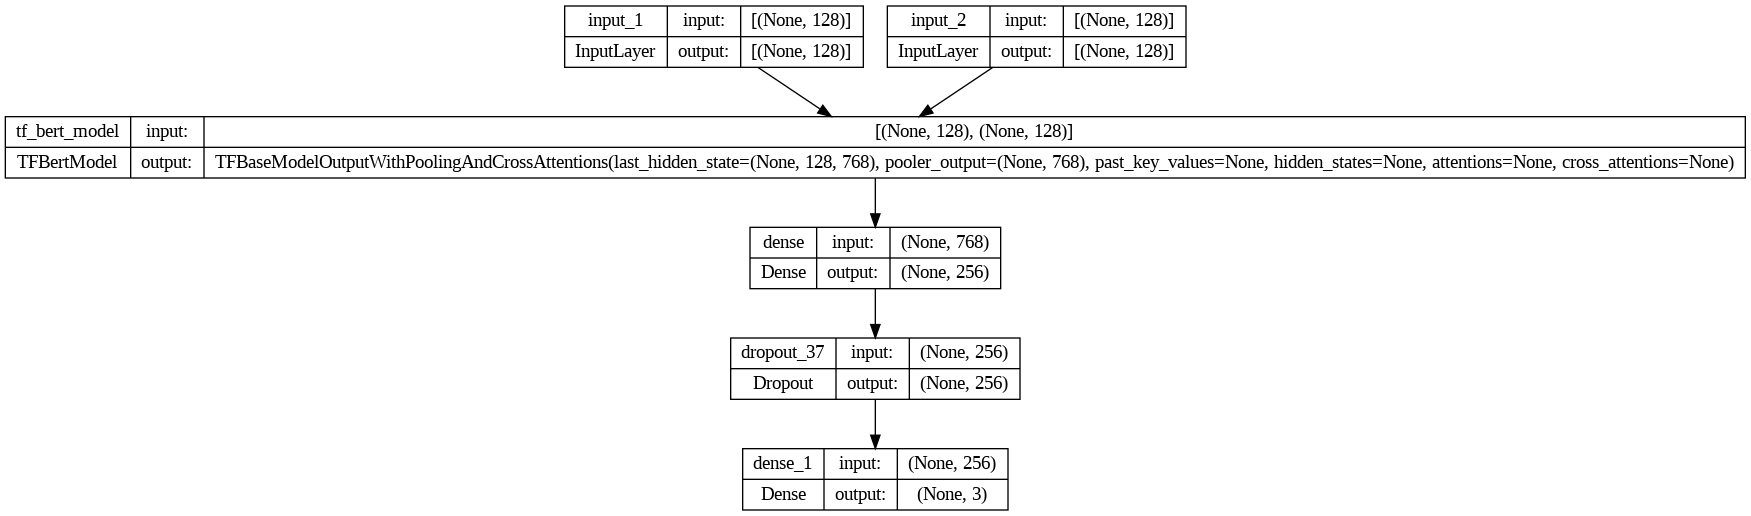

In [33]:
from PIL import Image

# Visualiza la arquitectura del modelo y guarda la imagen
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Muestra la imagen en la pantalla
img = Image.open('model.png')
img.show()

### 3.2 Entrenar modelo

In [34]:
# ajustar el transformador BERT
history_bert = model.fit([train_input_ids, train_attention_masks], y_train, validation_data=([val_input_ids, val_attention_masks], y_val), epochs=4, batch_size=32)

Epoch 1/4
433/433 [==============================] - 407s 840ms/step - loss: 0.7107 - categorical_accuracy: 0.6781 - val_loss: 0.4569 - val_categorical_accuracy: 0.8272
Epoch 2/4
433/433 [==============================] - 364s 841ms/step - loss: 0.3801 - categorical_accuracy: 0.8556 - val_loss: 0.3388 - val_categorical_accuracy: 0.8710
Epoch 3/4
433/433 [==============================] - 364s 841ms/step - loss: 0.2479 - categorical_accuracy: 0.9117 - val_loss: 0.3428 - val_categorical_accuracy: 0.8833
Epoch 4/4
433/433 [==============================] - 364s 842ms/step - loss: 0.1756 - categorical_accuracy: 0.9425 - val_loss: 0.3176 - val_categorical_accuracy: 0.8878


* **Precisión y la pérdida a lo largo del tiempo**

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


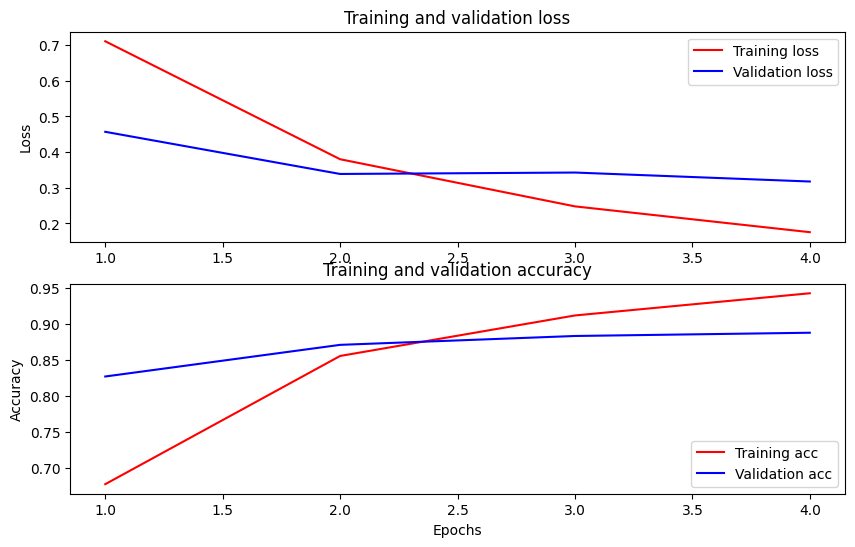

In [35]:
history_dict = history_bert.history
print(history_dict.keys())

acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

### 3.4. Predecir y evaluar el modelo 

In [36]:
result_bert = model.predict([test_input_ids,test_attention_masks])

90/90 [==============================] - 29s 290ms/step


In [37]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(5,5))
    labels=['Negative', 'Neutral', 'Positive']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17) 
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Test', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()

In [38]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

* **Evaluación del modelo**

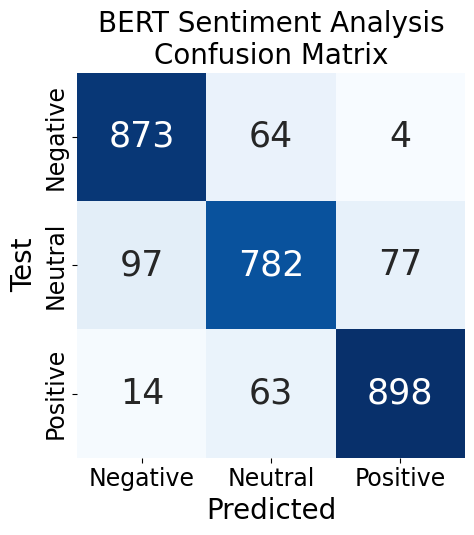

In [39]:
conf_matrix(y_test.argmax(1), y_pred_bert.argmax(1),'BERT Sentiment Analysis\nConfusion Matrix')

In [40]:
print('\tClassification Report for BERT:\n\n',classification_report(y_test,y_pred_bert, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for BERT:

               precision    recall  f1-score   support

    Negative       0.89      0.93      0.91       941
     Neutral       0.86      0.82      0.84       956
    Positive       0.92      0.92      0.92       975

   micro avg       0.89      0.89      0.89      2872
   macro avg       0.89      0.89      0.89      2872
weighted avg       0.89      0.89      0.89      2872
 samples avg       0.89      0.89      0.89      2872



## 4. Observaciones generales

Algunas observaciones que pueden extraerse de los resultados del modelo BERT son:
* Este modelo es una red neuronal que utiliza la arquitectura BERT para realizar una tarea de clasificación de textos. La entrada del modelo son dos secuencias de texto (input_1 y input_2) de longitud máxima 128, y la salida del modelo es una predicción de las tres categorías posibles (Negative, Neutral, Positive). El modelo utiliza una capa densa y una capa de dropout para mejorar la generalización y evitar el overfitting. El modelo tiene un total de 109,679,875 parámetros, que se pueden entrenar para adaptar el modelo a la tarea específica.

* El modelo presenta un desempeño general bueno, con un promedio de precisión, recall y F1-score de 0.89.

* El modelo tiene un desempeño similar en las categorías de sentimiento "negativo" y "positivo", con una precisión de 0.85 y 0.92 respectivamente. En cambio, el desempeño en la categoría "neutral" es ligeramente menor, con una precisión de 0.85.

* El modelo tiene una buena capacidad para identificar la mayoría de los casos de cada categoría, como lo muestra el recall promedio de 0.89.

* Aunque el modelo tiene un buen desempeño general, todavía hay margen para mejorar su capacidad para identificar casos en la categoría "neutral", ya que tanto la precisión como el recall para esta categoría son ligeramente más bajos que para las otras dos categorías.

En general, el modelo parece ser adecuado para la tarea de clasificación de sentimientos en tweets, aunque como siempre, es importante tener en cuenta las limitaciones del conjunto de datos y considerar la posibilidad de ajustar los hiperparámetros del modelo para obtener un mejor desempeño en el conjunto de prueba.

## 5. Evaluar modelo

In [41]:
## Loading test data
X_test = pd.read_csv('test_data.csv')

### 5.1  Limpieza del texto

In [42]:
# Create funtion to proccess the tweets

def remove_short_tweets(df, column_name):
    # Print tweets with less than 5 characters
    print(f"Tweets with less than 5 characters in column '{column_name}':")
    short_tweets = df[df[column_name].str.len() < 5][column_name]
    print(short_tweets)
    
    # Drop rows with less than 5 characters in the tweet
    df.drop(df[df[column_name].str.len() < 5].index, inplace=True)
    
    print(f"Total number of rows removed: {len(short_tweets)}")

In [43]:
def remove_mention_only_tweets(df, column_name):
    # Print tweets with only mentions (and + 0, or 1 characters)
    print(f"Tweets with only mentions in column '{column_name}':")
    mention_only_tweets = df[df[column_name].str.replace("@[^\s]+", "").str.len() < 2][column_name]
    print(mention_only_tweets)
    
    # Drop the tweets that contain only mentions
    df.drop(df[df[column_name].str.replace("@[^\s]+", "").str.len()<2].index, inplace=True)
    
    print(f"Total number of rows removed: {len(mention_only_tweets)}")

In [44]:
def reset_dataframe_indexes(df):
    df.reset_index(drop=True, inplace=True)
    print("DataFrame indexes reset successfully!")

In [45]:
def preproces_tweet(tweet):
    # Eliminar menciones (@nombredeusuario) y URLs
    tweet = re.sub(r'@[A-Za-z0-9]+|https?://[A-Za-z0-9./]+', '', tweet)
    
    # Convertir el texto a minúsculas
    tweet = tweet.lower()
    
    # Eliminar signos de puntuación
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet)
    
    # Eliminar números
    tweet = re.sub(r'\d+', '', tweet)
    
    # Eliminar palabras comunes (stopwords)
    stop_words = stopwords.words('english') + ['u', 'im', 'c', 'n']
    words = tweet.split()
    words = [word for word in words if word not in stop_words]
    
    # Lematización (reducir las palabras a su raíz)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    tweet = ' '.join(words)
    
    return tweet

In [46]:
def remove_empty_space_records(df, column_name):
    if '' in df[column_name].values:
        print(df[column_name].value_counts()[''])
    else:
        print(f"No hay valores vacíos en '{column_name}'.")
        
    # Eliminar los registros con espacios vacíos
    df.drop(df[df[column_name] == ''].index, inplace=True)
    
    # Resetear los índices
    df.reset_index(drop=True, inplace=True)
    
    print("Registros con espacios vacíos eliminados y los índices reseteados.")

In [47]:
def convert_to_string(df, column_name):
    df[column_name] = df[column_name].astype(str)
    print(f"La columna '{column_name}' ha sido convertida a tipo 'string'.")

In [49]:
import re
import string

#import NLTK
import nltk
nltk.download('punkt') #Punkt es una biblioteca que se utiliza para tokenizar frases en lenguaje natural
nltk.download('stopwords') # library "stopwords"
nltk.download('wordnet') # 
nltk.download('omw-1.4') #
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#import librerias de pre-procesamiento y normalizacion
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.tag import pos_tag

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [51]:
# Pre-processing the tweets

#Remove short tweets
remove_short_tweets(X_test, "tweet")

#remove mention only tweets
remove_mention_only_tweets(X_test, "tweet")

#reset dataframe indexes
reset_dataframe_indexes(X_test)

#pre-procesar los tweets
X_test['tweet'] = X_test['tweet'].apply(preproces_tweet)

#remove empty space records
remove_empty_space_records(X_test, "tweet")

#convert to string
convert_to_string(X_test, "tweet")

#reset dataframe indexes
reset_dataframe_indexes(X_test)

Tweets with less than 5 characters in column 'tweet':
189     love
259     love
365     love
369     love
445     love
500     love
525     love
586     love
626     hate
664     love
721     love
807     love
847     love
1135    love
1209    love
1211    love
1270    love
1284    love
1437    love
1440    love
1452    love
1602      ☝🏻
1610    love
1677    love
1739    love
1743    love
1786    love
1800    love
1832    love
1872    love
1880    love
1955    love
1974     yes
2019    love
2176    yeah
2261    love
2287    love
2330    love
2381    love
2412    love
2416    love
2475    love
2491    hate
2503    love
2516    hate
2584    love
Name: tweet, dtype: object
Total number of rows removed: 46
Tweets with only mentions in column 'tweet':
Series([], Name: tweet, dtype: object)
Total number of rows removed: 0
DataFrame indexes reset successfully!
No hay valores vacíos en 'tweet'.
Registros con espacios vacíos eliminados y los índices reseteados.
La columna 'tweet' ha sido conver

In [52]:
# Display X
X_test

,tweet
0,please offer cc atv color blue
1,always love always ill go always love always l...
2,careful date alot people aint looking love loo...
3,love xx
4,tik tok ceo experience available child singapo...
...,...
2567,ready love trust always business help eachothe...
2568,it’s ramadan need quiet
2569,haaaaappy birthday love
2570,word hate subjective pending lens youre lookin...


## 5.2 Aplicar el modelo

In [54]:
# tokenizar los nuevos tweets
new_tokens = tokenizer.batch_encode_plus(
    X_test['tweet'].values.tolist(),
    max_length=128,
    padding='max_length',
    truncation=True,
    return_attention_mask=True,
    return_token_type_ids=False,
    add_special_tokens=True,
    return_tensors='tf')

In [56]:
# hacer las predicciones con el modelo de BERT
new_predictions = model.predict([new_tokens['input_ids'], new_tokens['attention_mask']])

81/81 [==============================] - 24s 293ms/step


In [57]:
new_labels = [np.argmax(pred) for pred in new_predictions]

In [58]:
# agregar las etiquetas predichas al dataframe de nuevos tweets
X_test['label_emotion'] = new_labels

In [59]:
X_test.head()

,tweet,label_emotion
0,please offer cc atv color blue,2
1,always love always ill go always love always l...,2
2,careful date alot people aint looking love loo...,0
3,love xx,2
4,tik tok ceo experience available child singapo...,0


In [61]:
X_test['label_emotion'].value_counts()

2    1707
0     507
1     358
Name: label_emotion, dtype: int64

In [63]:
X_test[X_test['label_emotion'] == 0]

,tweet,label_emotion
2,careful date alot people aint looking love loo...,0
4,tik tok ceo experience available child singapo...,0
23,literally changed ecosystem fun……i hate ppl,0
25,“i piece shit man cheated wife instead helping...,0
26,ive watching entire life hate air breathes,0
...,...,...
2537,hate internet man 😂🤦🏾‍♂️,0
2539,everything make anxious hate,0
2541,bill hate drafting offense unless name josh al...,0
2566,post depressed gender give break female litera...,0


In [65]:
X_test[X_test['label_emotion'] == 1]

,tweet,label_emotion
8,love sing top lungsand range master bathroom p...,1
10,aesthetic demolished empty lot,1
32,empty space neta,1
34,harmstrong don’t hate couple share everything 😂,1
53,worst video watch today promise,1
...,...,...
2547,it’s fun amp game till somebody loses eye head...,1
2559,back root daenerys stormborn egyptianish fashi...,1
2561,literal sacrifice life since old,1
2564,everyone love talking bipolar egirls shit one ...,1


In [66]:
X_test[X_test['label_emotion'] == 2]

,tweet,label_emotion
0,please offer cc atv color blue,2
1,always love always ill go always love always l...,2
3,love xx,2
5,beyondfast love nvidia,2
6,james kjv blessed man endureth temptation trie...,2
...,...,...
2563,love mate,2
2565,🔊 nowplaying bbcradios futuresounds claraamfo ...,2
2567,ready love trust always business help eachothe...,2
2569,haaaaappy birthday love,2


In [67]:
X_test.to_csv('out_bert.csv')